In [1]:
import pandas as pd

In [182]:
from glob import glob
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)
    print(df.columns.tolist(), '\n')

competition_data\bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data\components.csv (2048, 3)
['component_id', 'name', 'component_type_id'] 

competition_data\comp_adaptor.csv (25, 20)
['component_id', 'component_type_id', 'adaptor_angle', 'overall_length', 'end_form_id_1', 'connection_type_id_1', 'length_1', 'thread_size_1', 'thread_pitch_1', 'nominal_size_1', 'end_form_id_2', 'connection_type_id_2', 'length_2', 'thread_size_2', 'thread_pitch_2', 'nominal_size_2', 'hex_size', 'unique_feature', 'orientation', 'weight'] 

competition_data\comp_boss.csv (147, 15)
['component_id', 'component_type_id', 'type', 'connection_type_id', 'outside_shape', 'base_type', 'height_over_tube', 'bolt_pattern_long', 'bolt_pattern_w

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [5]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

In [10]:
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()

In [11]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)

In [14]:
train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [15]:
train.describe(exclude='number')

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01,Yes
freq,12,15391,2077,19699


In [16]:
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [ ]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

In [17]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [23]:
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data\bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data\specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data\test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data\train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data\tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end

In [22]:
import category_encoders as ce

In [242]:
pd.read_csv('competition_data/bill_of_materials.csv').isnull().sum()

tube_assembly_id        0
component_id_1       2049
quantity_1           2049
component_id_2       6412
quantity_2           6412
component_id_3      16407
quantity_3          16400
component_id_4      20591
quantity_4          20590
component_id_5      21106
quantity_5          21106
component_id_6      21172
quantity_6          21172
component_id_7      21191
quantity_7          21191
component_id_8      21197
quantity_8          21197
dtype: int64

In [169]:
pd.read_csv('competition_data/bill_of_materials.csv', usecols = ['tube_assembly_id','component_id_1','quantity_1']).fillna(method='ffill').head()

,tube_assembly_id,component_id_1,quantity_1
0,TA-00001,C-1622,2.0
1,TA-00002,C-1312,2.0
2,TA-00003,C-1312,2.0
3,TA-00004,C-1312,2.0
4,TA-00005,C-1624,1.0


In [158]:
pd.read_csv('competition_data/tube.csv',).isnull().sum()

tube_assembly_id      0
material_id         279
diameter              0
wall                  0
length                0
num_bends             0
bend_radius           0
end_a_1x              0
end_a_2x              0
end_x_1x              0
end_x_2x              0
end_a                 0
end_x                 0
num_boss              0
num_bracket           0
other                 0
dtype: int64

In [181]:
pd.read_csv('competition_data/components.csv')

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026
5,C-0005,ADAPTER-STR,CP-028
6,C-0006,ADAPTER-STR,CP-028
7,C-0007,CONNECTOR-FLARE,CP-014
8,C-0008,BOSS,CP-018
9,C-0009,BOSS,CP-018


In [194]:
pd.read_csv('competition_data\comp_elbow.csv').isnull().sum(),pd.read_csv('competition_data\comp_elbow.csv').shape

(component_id            0
 component_type_id       0
 bolt_pattern_long       7
 bolt_pattern_wide      40
 extension_length        8
 overall_length          3
 thickness               7
 drop_length             7
 elbow_angle            48
 mj_class_code         137
 mj_plug_class_code    138
 plug_diameter         171
 groove                  0
 unique_feature          0
 orientation             0
 weight                  2
 dtype: int64, (178, 16))

In [176]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [175]:
pd.read_csv('competition_data/components.csv')

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026
5,C-0005,ADAPTER-STR,CP-028
6,C-0006,ADAPTER-STR,CP-028
7,C-0007,CONNECTOR-FLARE,CP-014
8,C-0008,BOSS,CP-018
9,C-0009,BOSS,CP-018


In [33]:
pd.read_csv??

In [ ]:
# def wrangle(X):
#     X = X.copy()
    
#     # Engineer date features
#     X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
#     X['quote_date_year'] = X['quote_date'].dt.year
#     X['quote_date_month'] = X['quote_date'].dt.month
#     X = X.drop(columns='quote_date')
    
#     # Merge tube data
#     tube = pd.read_csv('competition_data/tube.csv')
#     bill = pd.read_csv('competition_data/bill_of_materials.csv', 
#                 usecols = 
#                 ['tube_assembly_id','component_id_1','quantity_1','component_id_2','quantity_2']).fillna(method='ffill')
#     spec = pd.read_csv('competition_data/specs.csv',
#                        usecols = ['tube_assembly_id','spec1','spec2'],
#                        na_values = 'MISSING')
#     comp = pd.read_csv('competition_data/components.csv')
#     comp_elbow = pd.read_csv('competition_data\comp_elbow.csv').drop(
#         ['mj_class_code','mj_plug_class_code','plug_diameter'],axis=1)
    
#     X = X.merge(tube, how='left').merge(bill, how='left').merge(spec, how='left').merge(
#         comp, left_on='component_id_1', right_on = 'component_id' )
    
    
#     for cols in X.columns:
#         X[cols] = X[cols].fillna(method='ffill')
#         X[cols] = X[cols].fillna(method='bfill')

    
#     # Drop tube_assembly_id because our goal is to predict unknown assemblies
#     X = X.drop(columns=['tube_assembly_id','material_id'])

#     return X


# train_wrangled = wrangle(train)
# val_wrangled = wrangle(val)
# test_wrangled = wrangle(test)

In [314]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    bill = pd.read_csv('competition_data/bill_of_materials.csv', 
                usecols = 
                ['tube_assembly_id','component_id_1','quantity_1','component_id_2','quantity_2']).fillna(method='ffill')
    spec = pd.read_csv('competition_data/specs.csv',
                       usecols = ['tube_assembly_id','spec1','spec2'],
                       na_values = 'MISSING')
    comp = pd.read_csv('competition_data/components.csv')
    comp_elbow = pd.read_csv('competition_data\comp_elbow.csv').drop(
        ['mj_class_code','mj_plug_class_code','plug_diameter'],axis=1)
    
    X = X.merge(tube, how='left').merge(bill, how='left').merge(spec, how='left')
    
    
    for cols in X.columns:
        X[cols] = X[cols].fillna('MISSING')

    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns=['tube_assembly_id'])

    return X


train_wrangled = wrangle(train)
val_wrangled = wrangle(val)
test_wrangled = wrangle(test)

In [282]:
train_wrangled

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,diameter,wall,...,end_x,num_boss,num_bracket,other,quantity_1,quantity_2,spec1,spec2,component_id,name
0,S-0066,0,0,Yes,1,21.972702,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
1,S-0066,0,0,Yes,2,12.407983,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
2,S-0066,0,0,Yes,5,6.668596,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
3,S-0066,0,0,Yes,10,4.754539,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
4,S-0066,0,0,Yes,25,3.608331,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
5,S-0066,0,0,Yes,50,3.291176,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
6,S-0066,0,0,Yes,100,3.149291,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
7,S-0066,0,0,Yes,250,3.065829,2013,7,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
8,S-0066,0,0,Yes,1,22.415050,2013,8,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED
9,S-0066,0,0,Yes,2,12.850331,2013,8,6.35,0.71,...,EF-008,0,0,0,2.0,2.0,SP-0063,SP-0070,C-1312,NUT-FLARED


In [224]:
from sklearn.pipeline import make_pipeline

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
import numpy as np

In [128]:
pd.read_csv??

In [257]:
train_wrangled.describe()

,annual_usage,min_order_quantity,quantity,cost,quote_date_year,quote_date_month,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other,quantity_1,quantity_2
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500,2012.061119,7.075438,17.294470,1.381985,97.291156,3.810191,43.706186,0.026118,0.003668,0.014142,1.640578,1.552678
std,1678.532065,13.262875,71.313125,27.622252,2.662399,2.667107,18.351639,0.630776,61.454507,2.193815,230.985857,0.190317,0.073035,0.158365,0.485700,0.503412
min,0.000000,0.000000,1.000000,0.523027,1987.000000,1.000000,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,3.855934,2012.000000,6.000000,9.520000,0.890000,49.000000,2.000000,19.050000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,10.000000,6.507236,2013.000000,8.000000,12.700000,1.240000,86.000000,3.000000,31.750000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2.000000,0.000000,40.000000,13.451951,2013.000000,9.000000,19.050000,1.650000,132.000000,5.000000,50.800000,0.000000,0.000000,0.000000,2.000000,2.000000
max,150000.000000,535.000000,2500.000000,1000.000000,2017.000000,12.000000,203.200000,7.900000,507.000000,17.000000,9999.000000,5.000000,3.000000,8.000000,4.000000,4.000000


In [308]:
train_wrangled.isnull().sum()

supplier              0
annual_usage          0
min_order_quantity    0
bracket_pricing       0
quantity              0
cost                  0
quote_date_year       0
quote_date_month      0
dtype: int64

In [311]:
list(train_wrangled.columns)

['supplier',
 'annual_usage',
 'min_order_quantity',
 'bracket_pricing',
 'quantity',
 'cost',
 'quote_date_year',
 'quote_date_month',
 'diameter',
 'wall',
 'length',
 'num_bends',
 'bend_radius',
 'end_a_1x',
 'end_a_2x',
 'end_x_1x',
 'end_x_2x',
 'end_a',
 'end_x',
 'num_boss',
 'num_bracket',
 'other',
 'component_id_1',
 'quantity_1',
 'component_id_2',
 'quantity_2',
 'spec1',
 'spec2']

In [326]:
features = ['supplier',
 'annual_usage',
 'min_order_quantity',
 'quantity',
 'quote_date_year',
 'quote_date_month',
 'material_id',
 'diameter',
 'wall',
 'length',
 'num_bends',
 'bend_radius',
 'end_a',
 'end_x',
 'num_boss',
 'other',
 'component_id_1',
 'quantity_1',
 'component_id_2',
 'quantity_2',
 'spec1',
 'spec2']

In [327]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]
target = 'cost'
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
X_test = test_wrangled[features]


pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1, max_depth = 25)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.27358214039179246

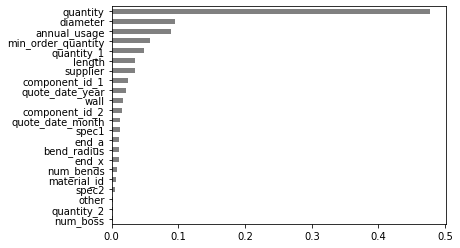

In [323]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, ce.OrdinalEncoder().fit_transform(X_train).columns)
importances.sort_values().plot.barh(color='grey');

In [148]:
RandomForestRegressor??

In [330]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01.csv', index=False,line_terminator='\r\n')

In [183]:
pd.merge??

In [329]:
submission.to_csv??